## Question 1

### a)

In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and standardize data
wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# First two principal components
print("First two principal components:\n", X_pca[:5])  # show sample rows


First two principal components:
 [[ 3.31675081  1.44346263]
 [ 2.20946492 -0.33339289]
 [ 2.51674015  1.0311513 ]
 [ 3.75706561  2.75637191]
 [ 1.00890849  0.86983082]]


### b)

In [2]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of first two components:", explained_variance)

Explained variance ratio of first two components: [0.36198848 0.1920749 ]


### c)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_pca, wine.target, test_size=0.4, random_state=42)

# Train SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.96      0.96      0.96        27
           2       1.00      1.00      1.00        19

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



### d)

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Split on original standardized features
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, wine.target, test_size=0.4, random_state=42)

# Train decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_orig, y_train)
y_pred_dt = dt.predict(X_test_orig)

print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        26
           1       0.84      1.00      0.92        27
           2       1.00      0.95      0.97        19

    accuracy                           0.93        72
   macro avg       0.95      0.93      0.93        72
weighted avg       0.94      0.93      0.93        72



### e)

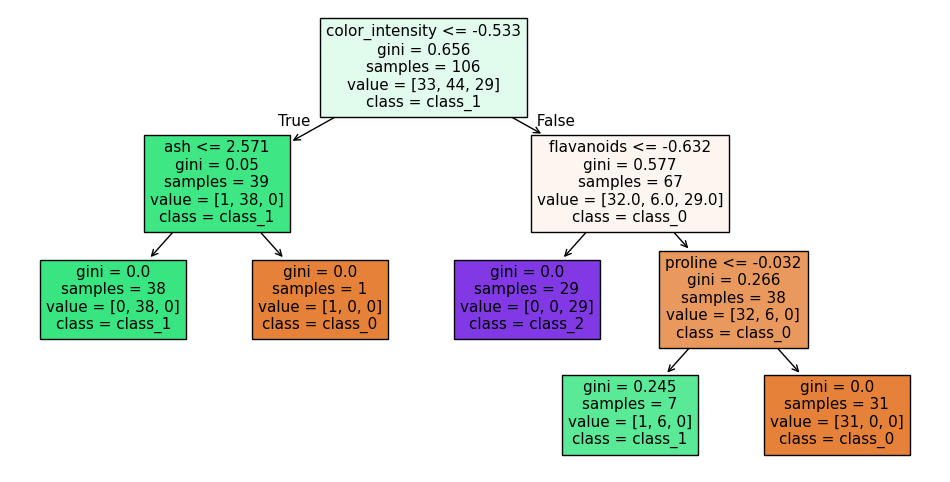

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()

## Quesiton 2

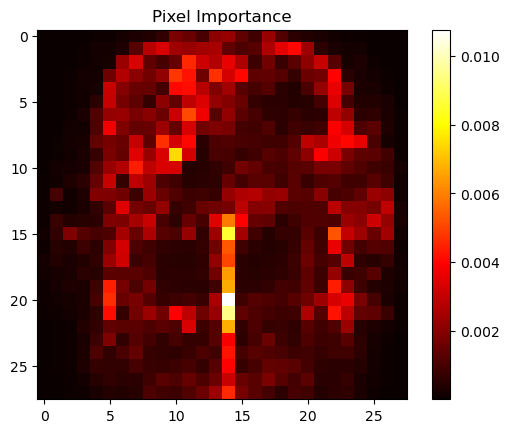

In [6]:
from sklearn.ensemble import RandomForestClassifier
from keras.datasets import fashion_mnist
import numpy as np

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
X = np.concatenate((X_train,X_test),axis=0)
y = np.concatenate((y_train,y_test),axis=0)

X = X.reshape((X.shape[0], -1)) / 255.0

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X, y)

importances = rf_clf.feature_importances_.reshape(28,28)

plt.imshow(importances, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Pixel Importance")
plt.show()

## Question 3

Epoch 1/20
31/31 [==============================] - 1s 3ms/step - loss: 123368.7969
Epoch 2/20
31/31 [==============================] - 0s 3ms/step - loss: 63174.4453
Epoch 3/20
31/31 [==============================] - 0s 3ms/step - loss: 9487.3281
Epoch 4/20
31/31 [==============================] - 0s 3ms/step - loss: 102.5015
Epoch 5/20
31/31 [==============================] - 0s 3ms/step - loss: 4.4224
Epoch 6/20
31/31 [==============================] - 0s 3ms/step - loss: 0.9698
Epoch 7/20
31/31 [==============================] - 0s 3ms/step - loss: 0.8357
Epoch 8/20
31/31 [==============================] - 0s 3ms/step - loss: 0.8285
Epoch 9/20
31/31 [==============================] - 0s 3ms/step - loss: 0.8303
Epoch 10/20
31/31 [==============================] - 0s 3ms/step - loss: 0.8278
Epoch 11/20
31/31 [==============================] - 0s 3ms/step - loss: 0.8239
Epoch 12/20
31/31 [==============================] - 0s 3ms/step - loss: 0.8300
Epoch 13/20
31/31 [================

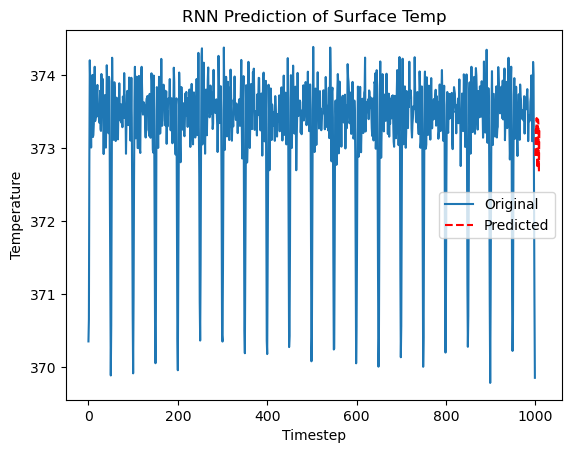

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Step 1: Load Data
data = np.load("surface_temp.npy")

# Step 2: Prepare sequences for training
def create_sequences(data, input_len=20, output_len=10):
    X, y = [], []
    for i in range(len(data) - input_len - output_len):
        X.append(data[i:i+input_len])
        y.append(data[i+input_len:i+input_len+output_len])
    return np.array(X), np.array(y)

# Use 20 timesteps to predict next 10
X, y = create_sequences(data, input_len=10, output_len=10)

# Reshape input for LSTM: (samples, timesteps, features)
X = X[..., np.newaxis]
y = y[..., np.newaxis]

# Step 3: Build RNN model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(10)  # Output 10 future values
])
model.compile(optimizer='adam', loss='mse')

# Step 4: Train the model
model.fit(X, y.squeeze(), epochs=20, verbose=1)

# Step 5: Predict next 10 steps using last 20 timesteps
last_seq = data[-10:]
last_seq = last_seq[np.newaxis, ..., np.newaxis]
predicted = model.predict(last_seq)[0]

# Plot results
plt.plot(range(1000), data, label='Original')
plt.plot(range(1000, 1010), predicted, 'r--', label='Predicted')
plt.legend()
plt.xlabel('Timestep')
plt.ylabel('Temperature')
plt.title('RNN Prediction of Surface Temp')
plt.show()
